<a href="https://colab.research.google.com/github/LokeswariGottugundala/CODSOFT/blob/main/TASK_3_SALES_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sales prediction  by using machine learning in Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)


#Loading the  sales dataset

In [4]:
df = pd.read_csv('/content/advertising (1).csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isnull().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#checking for outier with  visualization

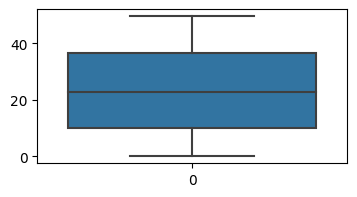

In [10]:
plt.figure(figsize = (4,2))
sns.boxplot(df['Radio'])
plt.show()

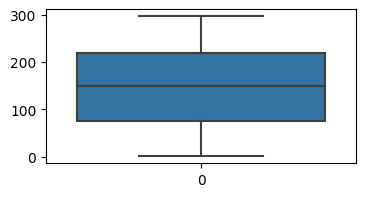

In [11]:
plt.figure(figsize = (4,2))
sns.boxplot(df['TV'])
plt.show()

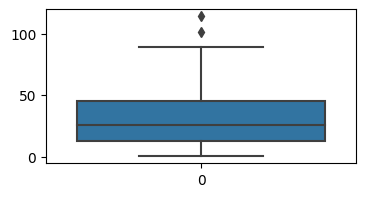

In [12]:
plt.figure(figsize = (4,2))
sns.boxplot(df['Newspaper'])
plt.show()

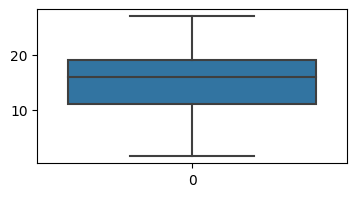

In [13]:
plt.figure(figsize = (4,2))
sns.boxplot(df['Sales'])
plt.show()

##In above graph , there is no outlier expect "newspaper"

In [14]:
IQR = df.Newspaper.quantile(0.75)  - df.Newspaper.quantile(0.25)
min_value = df['Newspaper'].quantile(0.25) - (IQR*1.5)
max_value =df['Newspaper'].quantile(0.75) - (IQR*1.5)
print(min_value , "\n", max_value)

-35.775000000000006 
 -3.4250000000000043


In [15]:
df = df.copy()

In [16]:
df.loc[df['Newspaper']>93 , 'Newspaper'] = 93

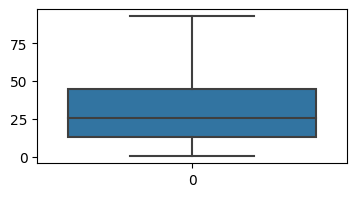

In [17]:
plt.figure(figsize=(4,2))
sns.boxplot(df['Newspaper'])
plt.show()

#Now  There is no outlier in dataset

<Axes: >

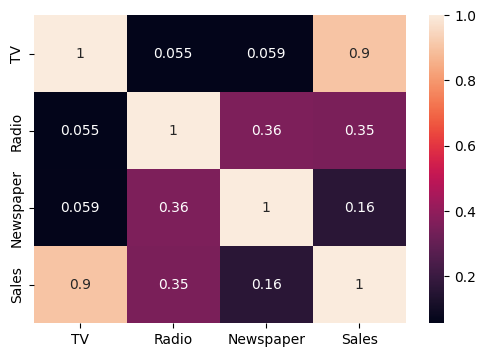

In [18]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(), annot =True)

###All data set is numeric form now , we can train the model now

#Target Variable and feature

In [19]:
# Create matrix of features
x = df.drop('Sales', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = df['Sales'] # y is the column we're trying to predict


In [20]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

###Model Training

In [21]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .33)

In [22]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [23]:
x_train.shape

(134, 3)

In [24]:
x_test.shape

(66, 3)

In [25]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [26]:
y_train.shape

(134,)

In [27]:

# Import model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create instance of model
lin_reg = LinearRegression()

# Pass training data into model
lin_reg.fit(x_train, y_train)
# pipe = make_pipeline(StandardScaler(), LinearRegression())
# pipe.fit(x_train, y_train)

LinearRegression()

#model predictions

In [28]:
# Predict
y_pred = lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(66,)
[19.54397435 22.26418102 17.64852454  7.30677305 17.18814641 19.36013534
  9.22727545 11.54793815 21.12648015  9.88002699 12.67548974 18.04418996
 17.32111492  9.629092   13.84442367 21.29329212 22.64189032 16.65658551
  8.93145488 24.25887665  9.92613981 16.57059674 10.58768339  8.26995911
 17.14006689 17.65992481 19.23517273 11.47925929 10.73621213 20.80090072
 12.91693796 13.33614406 19.27672046  9.49474393 14.40525371 15.2078895
 20.56707535 10.49551535 18.3739739   8.04666255 14.73460914 21.45470424
 18.09797745 15.28563459  9.49180034 18.16194415 18.84314221 15.7953939
 18.87923691 25.010208   18.0524147  18.41180569  7.20512501  9.26722115
 12.43863188 13.85952543 21.29606223 10.50709276 10.03117856 15.9032877
 16.75042322 15.23080074 23.27186594 19.31155235 17.13334338 15.74751112]


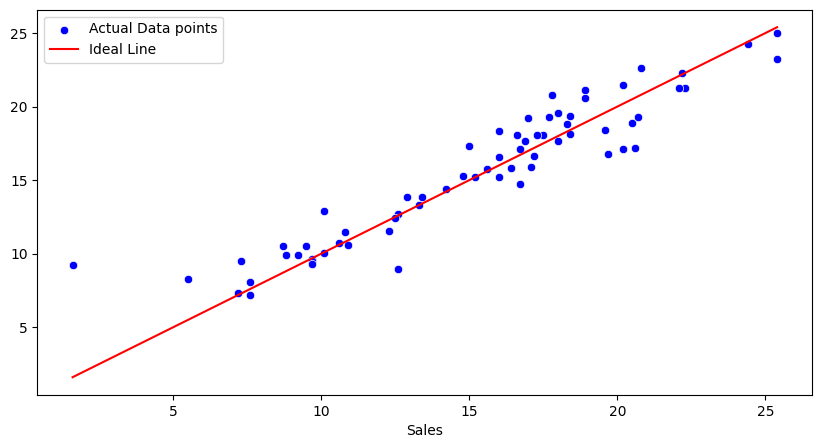

In [29]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

In [30]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))


# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
         18.00 |         19.54
         22.20 |         22.26
         18.00 |         17.65
          7.20 |          7.31
         20.60 |         17.19
         18.40 |         19.36
          1.60 |          9.23
         12.30 |         11.55
         18.90 |         21.13
          8.80 |          9.88
         12.60 |         12.68
         17.50 |         18.04
         15.00 |         17.32
          9.70 |          9.63
         13.40 |         13.84
         22.30 |         21.29
         20.80 |         22.64
         17.20 |         16.66
         12.60 |          8.93
         24.40 |         24.26
          9.20 |          9.93
         16.00 |         16.57
         10.90 |         10.59
          5.50 |          8.27
         20.20 |         17.14
         16.90 |         17.66
         17.00 |         19.24
         10.80 |         11.48
         10.60 |         10.74
         17.80 |         20.80
     

## **Residual Analysis**
Residual analysis in linear regression is a way to check how well the model fits the data. It involves looking at the differences (residuals) between the actual data points and the predictions from the model.


In [31]:
residual = actual- y_pred.reshape(-1)
print(residual)

[-3.94397435 -6.66418102 -2.04852454  8.29322695 -1.58814641 -3.76013534
  6.37272455  4.05206185 -5.52648015  5.71997301  2.92451026 -2.44418996
 -1.72111492  5.970908    1.75557633 -5.69329212 -7.04189032 -1.05658551
  6.66854512 -8.65887665  5.67386019 -0.97059674  5.01231661  7.33004089
 -1.54006689 -2.05992481 -3.63517273  4.12074071  4.86378787 -5.20090072
  2.68306204  2.26385594 -3.67672046  6.10525607  1.19474629  0.3921105
 -4.96707535  5.10448465 -2.7739739   7.55333745  0.86539086 -5.85470424
 -2.49797745  0.31436541  6.10819966 -2.56194415 -3.24314221 -0.1953939
 -3.27923691 -9.410208   -2.4524147  -2.81180569  8.39487499  6.33277885
  3.16136812  1.74047457 -5.69606223  5.09290724  5.56882144 -0.3032877
 -1.15042322  0.36919926 -7.67186594 -3.71155235 -1.53334338 -0.14751112]


<Axes: ylabel='Density'>

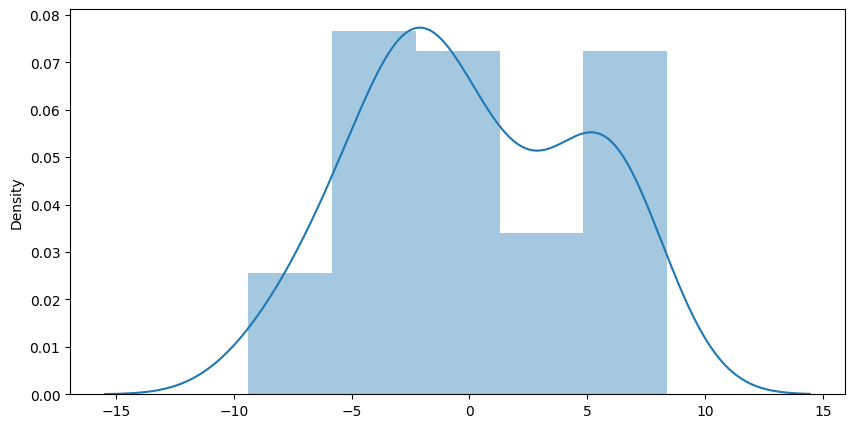

In [32]:
# Distribution plot for Residual (difference between actual and predicted values)
sns.distplot(residual, kde=True)

#Mean Squared error

In [33]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)

#measure r2_score
r2 =r2_score(y_test, y_pred)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("R2_score:" , r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
R2_score: 0.8824853415792712
Mean Squared Error: 2.9997685747910507
Root Mean Squared Error: 1.7319839995770894


#Decision Tree

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = DecisionTreeRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

r2_dt =r2_score(y_test, y_pred)
DTr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print("r2_score: ", r2_dt)
print('Decision Tree Regression: ',DTr)

r2_score:  0.8824853415792712
Decision Tree Regression:  2.1874242424242425


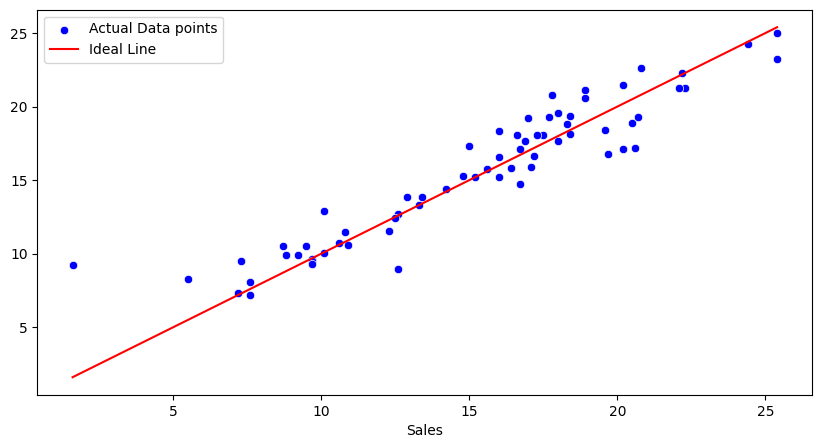

In [35]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()